In [50]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '/home/jw3514/Work/ASD_Circuits/src')
from ASD_Circuits import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
W_ipsi = pd.read_excel("../dat/allen-mouse-conn/nature13186-s4.xlsx", sheet_name="W_ipsi")
PValue_ipsi = pd.read_excel("../dat/allen-mouse-conn/nature13186-s4.xlsx", sheet_name="PValue_ipsi")
W_contra = pd.read_excel("../dat/allen-mouse-conn/nature13186-s4.xlsx", sheet_name="W_contra")
PValue_contra = pd.read_excel("../dat/allen-mouse-conn/nature13186-s4.xlsx", sheet_name="PValue_contra")
W_ipsi = W_ipsi.set_index("Unnamed: 0")
PValue_ipsi = PValue_ipsi.set_index("Unnamed: 0")
W_contra = W_contra.set_index("Unnamed: 0")
PValue_contra = PValue_contra.set_index("Unnamed: 0")

/home/jw3514/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/jw3514/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/jw3514/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/jw3514/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [52]:
RawDistance = pd.read_excel("../dat/allen-mouse-conn/41586_2014_BFnature13186_MOESM72_ESM.xlsx", 
                            index_col=0)
# Combined
DistanceMat_ipsi = pd.DataFrame(data=np.zeros((213,213)), index=W_ipsi.index.values,
                             columns=W_ipsi.columns.values)
DistanceMat_contra = pd.DataFrame(data=np.zeros((213,213)), index=W_contra.index.values,
                             columns=W_contra.columns.values)
for str_i in DistanceMat_ipsi.index.values:
    for str_j in DistanceMat_ipsi.columns.values:
        dist = RawDistance.loc["{}_ipsi".format(str_i), "{}_ipsi".format(str_j)]
        DistanceMat_ipsi.loc[str_i, str_j] = dist
        
for str_i in DistanceMat_contra.index.values:
    for str_j in DistanceMat_contra.columns.values:
        dist = RawDistance.loc["{}_ipsi".format(str_i), "{}_contra".format(str_j)]
        DistanceMat_contra.loc[str_i, str_j] = dist

In [53]:
weights_ipsi = []
pvalues_ipsi = []
weights_contra = []
pvalues_contra = []
distances_ipsi = []
distances_contra = []
for str_i in W_ipsi.index.values:
    for str_j in W_ipsi.index.values:
        w_ipsi = W_ipsi.loc[str_i, str_j]
        p_ipsi = PValue_ipsi.loc[str_i, str_j]
        w_contra = W_contra.loc[str_i, str_j]
        p_contra = PValue_contra.loc[str_i, str_j]
        d_ipsi = DistanceMat_ipsi.loc[str_i, str_j]
        d_contra = DistanceMat_contra.loc[str_i, str_j]
        if w_ipsi > 0:
            weights_ipsi.append(w_ipsi)
            pvalues_ipsi.append(p_ipsi)
            distances_ipsi.append(d_ipsi)
        if w_contra > 0:
            weights_contra.append(w_contra)
            pvalues_contra.append(p_contra)
            distances_contra.append(d_contra)

(-0.6976229726763606, 0.0)


Text(0.5, 1.0, 'contra')

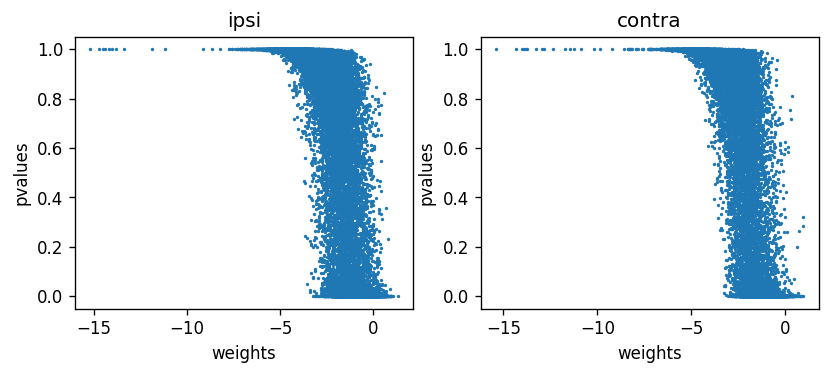

In [54]:
#plt.scatter(weights_ipsi, -np.log10(pvalues_ipsi), s=1)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3), dpi=120)
ax1.scatter(np.log10(weights_ipsi), pvalues_ipsi, s=1)
ax2.scatter(np.log10(weights_contra), pvalues_contra, s=1)
print(pearsonr(np.log10(weights_ipsi), pvalues_ipsi))
ax1.set_xlabel("weights")
ax1.set_ylabel("pvalues")
ax1.set_title("ipsi")
ax2.set_xlabel("weights")
ax2.set_ylabel("pvalues")
ax2.set_title("contra")

(-0.45044411639625304, 0.0)


Text(0.5, 1.0, 'contra')

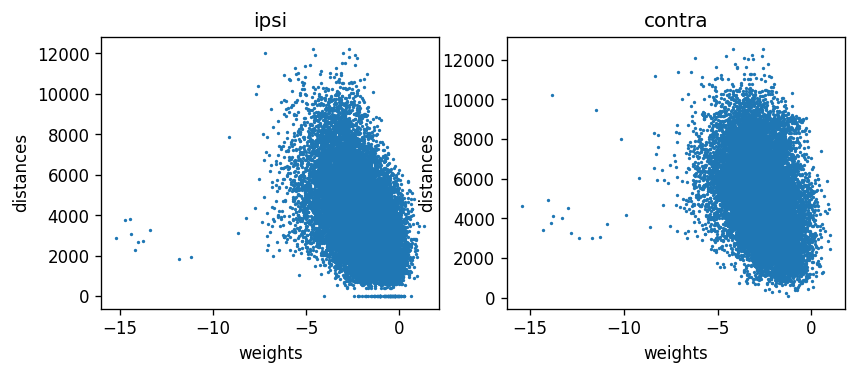

In [55]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3), dpi=120)
ax1.scatter(np.log10(weights_ipsi), distances_ipsi, s=1)
ax2.scatter(np.log10(weights_contra), distances_contra, s=1)
print(pearsonr(np.log10(weights_ipsi), distances_ipsi))
ax1.set_xlabel("weights")
ax1.set_ylabel("distances")
ax1.set_title("ipsi")
ax2.set_xlabel("weights")
ax2.set_ylabel("distances")
ax2.set_title("contra")

In [56]:
W_ipsi[PValue_ipsi > 0.05] = 0
W_contra[PValue_contra > 0.05] = 0

In [57]:
ontology = pd.read_csv("../dat/Other/ontology.csv")
#onotology = pd.read_csv("dat/voxel.csv")
#ontology["acronym"] = 
acronym2name = {}
for i, row in ontology.iterrows():
    acronym2name[row["acronym"]] = clean_name(row["safe_name"])

W_ipsi.columns = [acronym2name[x] for x in W_ipsi.columns.values]
W_ipsi.index = [acronym2name[x] for x in W_ipsi.index.values]

W_contra.columns = [acronym2name[x] for x in W_contra.columns.values]
W_contra.index = [acronym2name[x] for x in W_contra.index.values]

DistanceMat_ipsi.index = W_ipsi.index.values
DistanceMat_ipsi.columns = W_ipsi.columns.values

DistanceMat_contra.index = W_contra.index.values
DistanceMat_contra.columns = W_contra.columns.values

In [59]:
W_ipsi.to_csv("../dat/allen-mouse-conn/ScoreingMat_jw_v3/WeightMat.Ipsi.csv")

In [8]:
# ipsi, non-cortical
ALL_Distances = DistanceMat_ipsi.values.flatten()
DistanceDeciles_ipsi = np.percentile(ALL_Distances, np.arange(0, 100, 10))
DistanceDeciles_ipsi = np.append(DistanceDeciles_ipsi, max(ALL_Distances))
Pairs_Dist_ipsi, bins = np.histogram(ALL_Distances, bins=DistanceDeciles_ipsi)

distances = DistanceMat_ipsi[(W_ipsi>0)]
distances = distances[~np.isnan(distances)]
distances = np.nan_to_num(distances, nan=0).flatten()
distances = [x for x in distances if x >0]

Distances_w_edges = distances
Edges_Dist_ipsi, bins = np.histogram(Distances_w_edges, bins=DistanceDeciles_ipsi)

In [9]:
# contra, non-cortical
ALL_Distances = DistanceMat_contra.values.flatten()
DistanceDeciles_contra = np.percentile(ALL_Distances, np.arange(0, 100, 10))
DistanceDeciles_contra = np.append(DistanceDeciles_contra, max(ALL_Distances))
Pairs_Dist_contra, bins = np.histogram(ALL_Distances, bins=DistanceDeciles_contra)

distances = DistanceMat_contra[(W_contra>0)]
distances = distances[~np.isnan(distances)]
distances = np.nan_to_num(distances, nan=0).flatten()
distances = [x for x in distances if x >0]

Distances_w_edges = distances
Edges_Dist_contra, bins = np.histogram(Distances_w_edges, bins=DistanceDeciles_contra)

In [10]:
P_ipsi = Edges_Dist_ipsi/Pairs_Dist_ipsi
I_ipsi = -np.log2(P_ipsi)
I_ipsi_ = -np.log2(1-P_ipsi)

P_contra = Edges_Dist_contra/Pairs_Dist_contra
I_contra = -np.log2(P_contra)
I_contra_ = -np.log2(1-P_contra)

In [11]:
str2reg = STR2Region()
def AssignInfo(dist, bins, info):
    for i in range(len(bins)-1):
        if dist >= bins[i] and dist < bins[i+1]:
            return info[i]
    return info[-1]
    #print(dist)
    #print(bins)
    
def MakeInfoMat_Distance_Cortical_NonCortical_Ipsi_Contra(Bins, W_Infos, N_Infos, adjMat_ipsi, 
                    adjMat_contra, distMat_ipsi, distMat_contra, str2reg):
    DistanceBin_ipsi, DistanceBin_contra = Bins
    I_ipsi, I_contra, = W_Infos
    I_ipsi_, I_contra_ = N_Infos
    OutMat = pd.DataFrame(data=np.zeros((adjMat_ipsi.shape[0], adjMat_ipsi.shape[1])), 
                          index=adjMat_ipsi.index.values, columns=adjMat_ipsi.columns.values)
    for node_i in adjMat_ipsi.index.values:
        for node_j in adjMat_ipsi.columns.values:
            w_ipsi = adjMat_ipsi.loc[node_i, node_j]
            w_contra = adjMat_contra.loc[node_i, node_j]
            d_ipsi = distMat_ipsi.loc[node_i, node_j]
            d_contra = distMat_contra.loc[node_i, node_j]
            if node_i == node_j:
                OutMat.loc[node_i, node_j] = 0
            else:
                if w_ipsi > 0 and w_contra == 0:
                    OutMat.loc[node_i, node_j] += 0
                    OutMat.loc[node_i, node_j] += AssignInfo(d_ipsi, DistanceBin_ipsi, I_ipsi) 
                    OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra_)
                if w_ipsi == 0 and w_contra > 0:
                    OutMat.loc[node_i, node_j] += 0
                    OutMat.loc[node_i, node_j] += AssignInfo(d_ipsi, DistanceBin_ipsi, I_ipsi_) 
                    OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra) 
                if w_ipsi > 0 and w_contra > 0:
                    OutMat.loc[node_i, node_j] += 0
                    OutMat.loc[node_i, node_j] += AssignInfo(d_ipsi, DistanceBin_ipsi, I_ipsi) 
                    OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra) 
                if w_ipsi ==0 and w_contra ==0:
                    OutMat.loc[node_i, node_j] += 0
                    OutMat.loc[node_i, node_j] += AssignInfo(d_ipsi, DistanceBin_ipsi, I_ipsi_) 
                    OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra_) 
    return OutMat

Bins = [DistanceDeciles_ipsi, DistanceDeciles_contra]
W_Infos = [I_ipsi, I_contra]
N_Infos = [I_ipsi_, I_contra_]
InfoMat = MakeInfoMat_Distance_Cortical_NonCortical_Ipsi_Contra(
    Bins, W_Infos, N_Infos, W_ipsi, W_contra, DistanceMat_ipsi, DistanceMat_contra, str2reg)

In [12]:
Ncont = 100
contDir = "../dat/Unionize_bias/SubSampleSib/"
topNs = list(range(200, 5, -5))

def SI_Rank_profile_Case(ASD_BiasDF, InfoMat, topNs):
    asd_scores = []
    for topN in topNs:
        top_strs = ASD_BiasDF.index.values[:topN]
        score = ScoreCircuit_SI_Joint(top_strs, InfoMat)
        asd_scores.append(score)
    asd_scores = np.array(asd_scores)
    return asd_scores

def SI_Rank_Profile_Ctrl(contDir, InfoMat, topNs, Ncont=100):
    ASD_Cont_SI_SCores_All = []
    for i, file in enumerate(os.listdir(contDir)):
        if file.startswith("cont.genes"):
            continue
        df = pd.read_csv(contDir + file, index_col="STR")
        cont_scores = []
        for topN in topNs:
            top_strs = df.index.values[:topN]
            score = ScoreCircuit_SI_Joint(top_strs, InfoMat)
            cont_scores.append(score)
        cont_scores = np.array(cont_scores)
        ASD_Cont_SI_SCores_All.append(cont_scores)
        if i >= Ncont -1:
            break
    ASD_Cont_SI_SCores_All = np.array(ASD_Cont_SI_SCores_All)
    return ASD_Cont_SI_SCores_All

In [13]:
ASD_BiasDF = pd.read_csv("../dat/Unionize_bias/Spark_Meta_EWS.Z2.bias.FDR.csv", index_col="STR")
Ncont = 100
contDir = "../dat/Unionize_bias/SubSampleSib/"
topNs = list(range(200, 5, -5))

In [14]:
asd_score = ScoreCircuit_SI_Joint(ASD_BiasDF.head(46).index.values, InfoMat)
asd_score

0.9039803595930312

In [15]:
ipsi_case_profile = SI_Rank_profile_Case(ASD_BiasDF, InfoMat, topNs)
ipsi_ctrl_profile = SI_Rank_Profile_Ctrl(contDir, InfoMat, topNs)

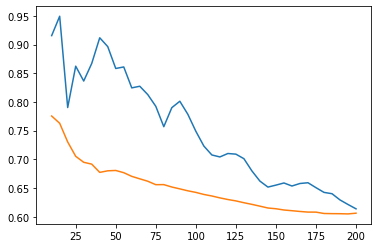

In [16]:
plt.plot(topNs, ipsi_case_profile)
plt.plot(topNs, ipsi_ctrl_profile.mean(axis=0))

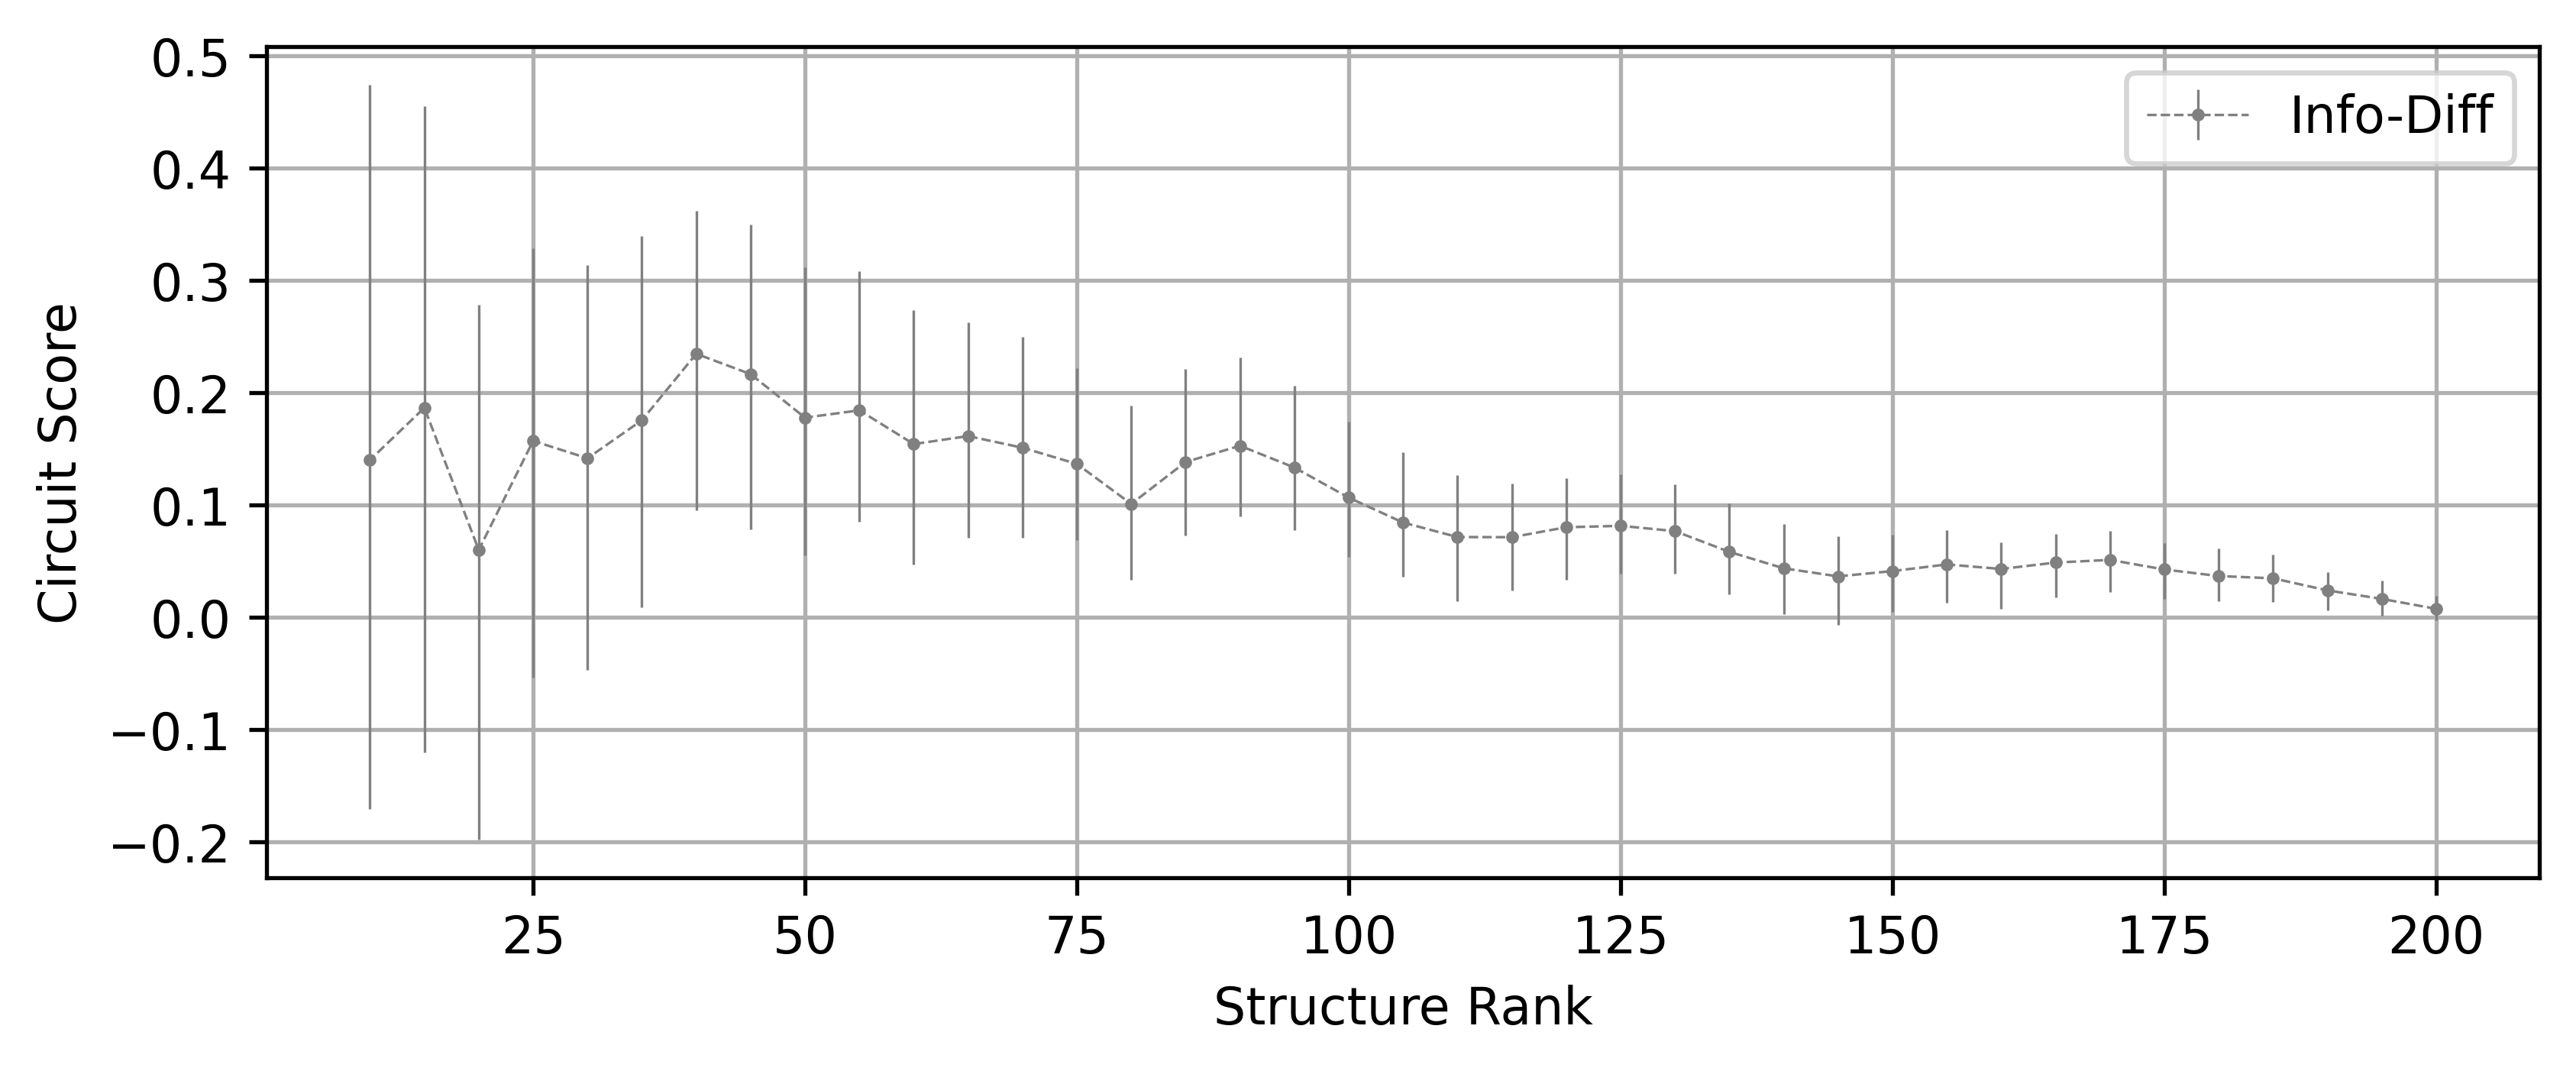

In [17]:
fig, ax = plt.subplots(dpi=480, figsize=(8,3))
cont_xx = ipsi_case_profile - ipsi_ctrl_profile
cont = np.nanmean(ipsi_ctrl_profile, axis=0)
mean = cont_xx.mean(axis=0)
lower = np.percentile(cont_xx, 50-34.1, axis=0)
upper = np.percentile(cont_xx, 50+34.1, axis=0)
ax.errorbar(topNs, mean, color="grey", marker="o", markersize=1.5, lw=0.5,
            yerr=(mean - lower, upper - mean ), ls="dashed", label="Info-Diff")

ax.grid(True)
ax.set_xlabel("Structure Rank")
ax.set_ylabel("Circuit Score")
plt.legend()

In [18]:
topN = 46

Ncont = 10000
contDir = "../dat/Unionize_bias/SubSampleSib/"

def TestPAtSize(ASD_BiasDF, contDir, topN, InfoMat):
    topN_bias = []
    cont_topN_Scores = []

    for i, file in enumerate(os.listdir(contDir)):
        if not file.startswith("cont.bias."):
            continue
        df = pd.read_csv(contDir + file, index_col="STR")
        top_strs = df.index.values[:topN]
        cont_score = ScoreCircuit_SI_Joint(top_strs, InfoMat)
        cont_topN_Scores.append(cont_score)
        if i > Ncont:
            break
    asd_score = ScoreCircuit_SI_Joint(ASD_BiasDF.head(topN).index.values, InfoMat)
    return asd_score, cont_topN_Scores

<AxesSubplot: title={'center': 'ipsi+contra'}, xlabel='Normed Score'>

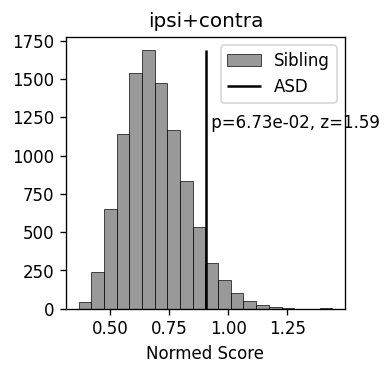

In [19]:
topN = 46
asd_score, cont_topN_Scores = TestPAtSize(
    ASD_BiasDF, contDir, topN, InfoMat)
fig, axs = plt.subplots(1,1, dpi=120, figsize=(3,3))
PlotPermutationP(cont_topN_Scores, asd_score, axs,
                     title="ipsi+contra".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")

In [20]:
def MakeInfoMat_Distance_Cortical_NonCortical_Ipsi(Bins, W_Infos, N_Infos, adjMat_ipsi, 
                    adjMat_contra, distMat_ipsi, distMat_contra, str2reg):
    DistanceBin_ipsi, DistanceBin_contra = Bins
    I_ipsi, I_contra, = W_Infos
    I_ipsi_, I_contra_ = N_Infos
    OutMat = pd.DataFrame(data=np.zeros((adjMat_ipsi.shape[0], adjMat_ipsi.shape[1])), 
                          index=adjMat_ipsi.index.values, columns=adjMat_ipsi.columns.values)
    for node_i in adjMat_ipsi.index.values:
        for node_j in adjMat_ipsi.columns.values:
            w_ipsi = adjMat_ipsi.loc[node_i, node_j]
            w_contra = adjMat_contra.loc[node_i, node_j]
            d_ipsi = distMat_ipsi.loc[node_i, node_j]
            d_contra = distMat_contra.loc[node_i, node_j]
            if node_i == node_j:
                OutMat.loc[node_i, node_j] = 0
            else:
                if w_ipsi > 0 and w_contra == 0:
                    OutMat.loc[node_i, node_j] += 0
                    OutMat.loc[node_i, node_j] += AssignInfo(d_ipsi, DistanceBin_ipsi, I_ipsi) 
                    #OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra_)
                if w_ipsi == 0 and w_contra > 0:
                    OutMat.loc[node_i, node_j] += 0
                    OutMat.loc[node_i, node_j] += AssignInfo(d_ipsi, DistanceBin_ipsi, I_ipsi_) 
                    #OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra) 
                if w_ipsi > 0 and w_contra > 0:
                    OutMat.loc[node_i, node_j] += 0
                    OutMat.loc[node_i, node_j] += AssignInfo(d_ipsi, DistanceBin_ipsi, I_ipsi) 
                    #OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra) 
                if w_ipsi ==0 and w_contra ==0:
                    OutMat.loc[node_i, node_j] += 0
                    OutMat.loc[node_i, node_j] += AssignInfo(d_ipsi, DistanceBin_ipsi, I_ipsi_) 
                    #OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra_) 
    return OutMat

Bins = [DistanceDeciles_ipsi, DistanceDeciles_contra]
W_Infos = [I_ipsi, I_contra]
N_Infos = [I_ipsi_, I_contra_]
InfoMat_ipsi = MakeInfoMat_Distance_Cortical_NonCortical_Ipsi(
    Bins, W_Infos, N_Infos, W_ipsi, W_contra, DistanceMat_ipsi, DistanceMat_contra, str2reg)

<AxesSubplot: title={'center': 'ipsi'}, xlabel='Normed Score'>

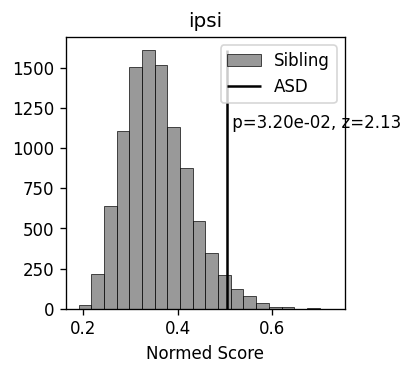

In [21]:
topN = 46
asd_score, cont_topN_Scores = TestPAtSize(
    ASD_BiasDF, contDir, topN, InfoMat_ipsi)
fig, axs = plt.subplots(1,1, dpi=120, figsize=(3,3))
PlotPermutationP(cont_topN_Scores, asd_score, axs,
                     title="ipsi".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")

In [22]:
def MakeInfoMat_Distance_Cortical_NonCortical_Contra(Bins, W_Infos, N_Infos, adjMat_ipsi, 
                    adjMat_contra, distMat_ipsi, distMat_contra, str2reg):
    DistanceBin_ipsi, DistanceBin_contra = Bins
    I_ipsi, I_contra, = W_Infos
    I_ipsi_, I_contra_ = N_Infos
    OutMat = pd.DataFrame(data=np.zeros((adjMat_ipsi.shape[0], adjMat_ipsi.shape[1])), 
                          index=adjMat_ipsi.index.values, columns=adjMat_ipsi.columns.values)
    for node_i in adjMat_ipsi.index.values:
        for node_j in adjMat_ipsi.columns.values:
            w_ipsi = adjMat_ipsi.loc[node_i, node_j]
            w_contra = adjMat_contra.loc[node_i, node_j]
            d_ipsi = distMat_ipsi.loc[node_i, node_j]
            d_contra = distMat_contra.loc[node_i, node_j]
            if node_i == node_j:
                OutMat.loc[node_i, node_j] = 0
            else:
                if w_ipsi > 0 and w_contra == 0:
                    OutMat.loc[node_i, node_j] += 0
                    #OutMat.loc[node_i, node_j] += AssignInfo(d_ipsi, DistanceBin_ipsi, I_ipsi) 
                    OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra_)
                if w_ipsi == 0 and w_contra > 0:
                    OutMat.loc[node_i, node_j] += 0
                    #OutMat.loc[node_i, node_j] += AssignInfo(d_ipsi, DistanceBin_ipsi, I_ipsi_) 
                    OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra) 
                if w_ipsi > 0 and w_contra > 0:
                    OutMat.loc[node_i, node_j] += 0
                    #OutMat.loc[node_i, node_j] += AssignInfo(d_ipsi, DistanceBin_ipsi, I_ipsi) 
                    OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra) 
                if w_ipsi ==0 and w_contra ==0:
                    OutMat.loc[node_i, node_j] += 0
                    #OutMat.loc[node_i, node_j] += AssignInfo(d_ipsi, DistanceBin_ipsi, I_ipsi_) 
                    OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra_) 
    return OutMat

Bins = [DistanceDeciles_ipsi, DistanceDeciles_contra]
W_Infos = [I_ipsi, I_contra]
N_Infos = [I_ipsi_, I_contra_]
InfoMat_contra = MakeInfoMat_Distance_Cortical_NonCortical_Contra(
    Bins, W_Infos, N_Infos, W_ipsi, W_contra, DistanceMat_ipsi, DistanceMat_contra, str2reg)

<AxesSubplot: title={'center': 'contra'}, xlabel='Normed Score'>

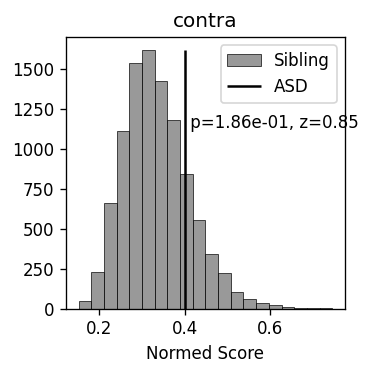

In [23]:
topN = 46
asd_score, cont_topN_Scores = TestPAtSize(
    ASD_BiasDF, contDir, topN, InfoMat_contra)
fig, axs = plt.subplots(1,1, dpi=120, figsize=(3,3))
PlotPermutationP(cont_topN_Scores, asd_score, axs,
                     title="contra".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")

In [24]:
# no contra-only connections
def MakeInfoMat_Distance_Cortical_NonCortical_xxx(Bins, W_Infos, N_Infos, adjMat_ipsi, 
                    adjMat_contra, distMat_ipsi, distMat_contra, str2reg):
    DistanceBin_ipsi, DistanceBin_contra = Bins
    I_ipsi, I_contra, = W_Infos
    I_ipsi_, I_contra_ = N_Infos
    OutMat = pd.DataFrame(data=np.zeros((adjMat_ipsi.shape[0], adjMat_ipsi.shape[1])), 
                          index=adjMat_ipsi.index.values, columns=adjMat_ipsi.columns.values)
    for node_i in adjMat_ipsi.index.values:
        for node_j in adjMat_ipsi.columns.values:
            w_ipsi = adjMat_ipsi.loc[node_i, node_j]
            w_contra = adjMat_contra.loc[node_i, node_j]
            d_ipsi = distMat_ipsi.loc[node_i, node_j]
            d_contra = distMat_contra.loc[node_i, node_j]
            if node_i == node_j:
                OutMat.loc[node_i, node_j] = 0
            else:
                if w_ipsi > 0 and w_contra == 0:
                    OutMat.loc[node_i, node_j] += 0
                    OutMat.loc[node_i, node_j] += AssignInfo(d_ipsi, DistanceBin_ipsi, I_ipsi) 
                    OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra_)
                if w_ipsi == 0 and w_contra > 0:
                    OutMat.loc[node_i, node_j] += 0
                    OutMat.loc[node_i, node_j] += AssignInfo(d_ipsi, DistanceBin_ipsi, I_ipsi_) 
                    #OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra) 
                    OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra_) 
                if w_ipsi > 0 and w_contra > 0:
                    OutMat.loc[node_i, node_j] += 0
                    OutMat.loc[node_i, node_j] += AssignInfo(d_ipsi, DistanceBin_ipsi, I_ipsi) 
                    OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra) 
                if w_ipsi ==0 and w_contra ==0:
                    OutMat.loc[node_i, node_j] += 0
                    OutMat.loc[node_i, node_j] += AssignInfo(d_ipsi, DistanceBin_ipsi, I_ipsi_) 
                    OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra_) 
    return OutMat

Bins = [DistanceDeciles_ipsi, DistanceDeciles_contra]
W_Infos = [I_ipsi, I_contra]
N_Infos = [I_ipsi_, I_contra_]
InfoMat_xxx = MakeInfoMat_Distance_Cortical_NonCortical_xxx(
    Bins, W_Infos, N_Infos, W_ipsi, W_contra, DistanceMat_ipsi, DistanceMat_contra, str2reg)

<AxesSubplot: title={'center': 'Info Per Edge Inside Circuit'}, xlabel='Normed Score'>

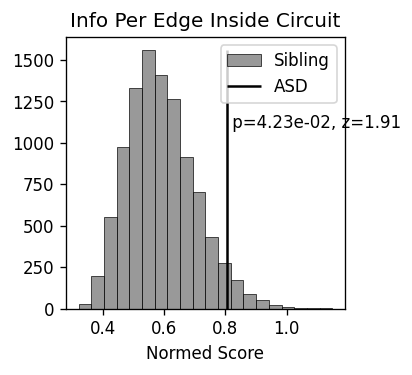

In [25]:
topN = 46
asd_score, cont_topN_Scores = TestPAtSize(
    ASD_BiasDF, contDir, topN, InfoMat_xxx)
fig, axs = plt.subplots(1,1, dpi=120, figsize=(3,3))
PlotPermutationP(cont_topN_Scores, asd_score, axs,
                     title="Info Per Edge Inside Circuit".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")

In [26]:
# only both connections, ipsi
def MakeInfoMat_Distance_Cortical_NonCortical_xx1(Bins, W_Infos, N_Infos, adjMat_ipsi, 
                    adjMat_contra, distMat_ipsi, distMat_contra, str2reg):
    DistanceBin_ipsi, DistanceBin_contra = Bins
    I_ipsi, I_contra, = W_Infos
    I_ipsi_, I_contra_ = N_Infos
    OutMat = pd.DataFrame(data=np.zeros((adjMat_ipsi.shape[0], adjMat_ipsi.shape[1])), 
                          index=adjMat_ipsi.index.values, columns=adjMat_ipsi.columns.values)
    for node_i in adjMat_ipsi.index.values:
        for node_j in adjMat_ipsi.columns.values:
            w_ipsi = adjMat_ipsi.loc[node_i, node_j]
            w_contra = adjMat_contra.loc[node_i, node_j]
            d_ipsi = distMat_ipsi.loc[node_i, node_j]
            d_contra = distMat_contra.loc[node_i, node_j]
            if node_i == node_j:
                OutMat.loc[node_i, node_j] = 0
            else:
                if w_ipsi > 0 and w_contra == 0:
                    OutMat.loc[node_i, node_j] += 0
                    #OutMat.loc[node_i, node_j] += AssignInfo(d_ipsi, DistanceBin_ipsi, I_ipsi) 
                    #OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra_)
                if w_ipsi == 0 and w_contra > 0:
                    OutMat.loc[node_i, node_j] += 0
                    #OutMat.loc[node_i, node_j] += AssignInfo(d_ipsi, DistanceBin_ipsi, I_ipsi_) 
                    #OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra) 
                    #OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra_) 
                if w_ipsi > 0 and w_contra > 0:
                    OutMat.loc[node_i, node_j] += 0
                    OutMat.loc[node_i, node_j] += AssignInfo(d_ipsi, DistanceBin_ipsi, I_ipsi) 
                    #OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra) 
                if w_ipsi ==0 and w_contra ==0:
                    OutMat.loc[node_i, node_j] += 0
                    #OutMat.loc[node_i, node_j] += AssignInfo(d_ipsi, DistanceBin_ipsi, I_ipsi_) 
                    #OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra_) 
    return OutMat

Bins = [DistanceDeciles_ipsi, DistanceDeciles_contra]
W_Infos = [I_ipsi, I_contra]
N_Infos = [I_ipsi_, I_contra_]
InfoMat_xx1 = MakeInfoMat_Distance_Cortical_NonCortical_xx1(
    Bins, W_Infos, N_Infos, W_ipsi, W_contra, DistanceMat_ipsi, DistanceMat_contra, str2reg)

<AxesSubplot: title={'center': 'Info Per Edge Inside Circuit'}, xlabel='Normed Score'>

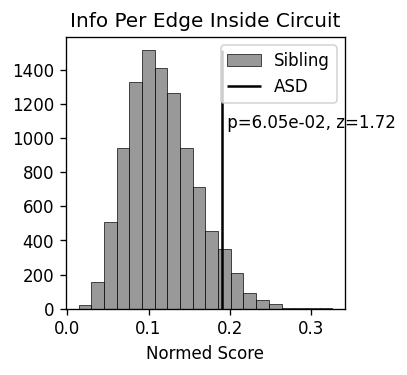

In [27]:
topN = 46
asd_score, cont_topN_Scores = TestPAtSize(
    ASD_BiasDF, contDir, topN, InfoMat_xx1)
fig, axs = plt.subplots(1,1, dpi=120, figsize=(3,3))
PlotPermutationP(cont_topN_Scores, asd_score, axs,
                     title="Info Per Edge Inside Circuit".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")

In [28]:
# only both connections, contra
def MakeInfoMat_Distance_Cortical_NonCortical_xx2(Bins, W_Infos, N_Infos, adjMat_ipsi, 
                    adjMat_contra, distMat_ipsi, distMat_contra, str2reg):
    DistanceBin_ipsi, DistanceBin_contra = Bins
    I_ipsi, I_contra, = W_Infos
    I_ipsi_, I_contra_ = N_Infos
    OutMat = pd.DataFrame(data=np.zeros((adjMat_ipsi.shape[0], adjMat_ipsi.shape[1])), 
                          index=adjMat_ipsi.index.values, columns=adjMat_ipsi.columns.values)
    for node_i in adjMat_ipsi.index.values:
        for node_j in adjMat_ipsi.columns.values:
            w_ipsi = adjMat_ipsi.loc[node_i, node_j]
            w_contra = adjMat_contra.loc[node_i, node_j]
            d_ipsi = distMat_ipsi.loc[node_i, node_j]
            d_contra = distMat_contra.loc[node_i, node_j]
            if node_i == node_j:
                OutMat.loc[node_i, node_j] = 0
            else:
                if w_ipsi > 0 and w_contra == 0:
                    OutMat.loc[node_i, node_j] += 0
                    #OutMat.loc[node_i, node_j] += AssignInfo(d_ipsi, DistanceBin_ipsi, I_ipsi) 
                    #OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra_)
                if w_ipsi == 0 and w_contra > 0:
                    OutMat.loc[node_i, node_j] += 0
                    #OutMat.loc[node_i, node_j] += AssignInfo(d_ipsi, DistanceBin_ipsi, I_ipsi_) 
                    #OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra) 
                    #OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra_) 
                if w_ipsi > 0 and w_contra > 0:
                    OutMat.loc[node_i, node_j] += 0
                    #OutMat.loc[node_i, node_j] += AssignInfo(d_ipsi, DistanceBin_ipsi, I_ipsi) 
                    OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra) 
                if w_ipsi ==0 and w_contra ==0:
                    OutMat.loc[node_i, node_j] += 0
                    #OutMat.loc[node_i, node_j] += AssignInfo(d_ipsi, DistanceBin_ipsi, I_ipsi_) 
                    #OutMat.loc[node_i, node_j] += AssignInfo(d_contra, DistanceBin_contra, I_contra_) 
    return OutMat

Bins = [DistanceDeciles_ipsi, DistanceDeciles_contra]
W_Infos = [I_ipsi, I_contra]
N_Infos = [I_ipsi_, I_contra_]
InfoMat_xx2 = MakeInfoMat_Distance_Cortical_NonCortical_xx2(
    Bins, W_Infos, N_Infos, W_ipsi, W_contra, DistanceMat_ipsi, DistanceMat_contra, str2reg)

<AxesSubplot: title={'center': 'Info Per Edge Inside Circuit'}, xlabel='Normed Score'>

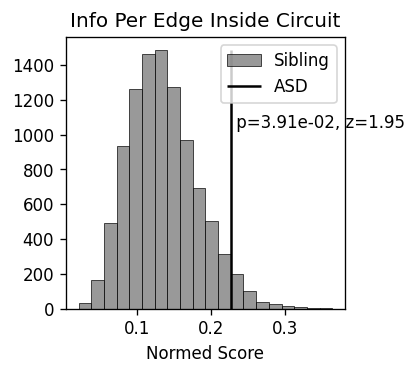

In [29]:
topN = 46
asd_score, cont_topN_Scores = TestPAtSize(
    ASD_BiasDF, contDir, topN, InfoMat_xx2)
fig, axs = plt.subplots(1,1, dpi=120, figsize=(3,3))
PlotPermutationP(cont_topN_Scores, asd_score, axs,
                     title="Info Per Edge Inside Circuit".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")

# compare weights

In [30]:
Contra_Only = []
Contra_wIpsi = []
Ipsi_Only = []
ipsi_wContra = []
for node_i in W_ipsi.index.values:
    for node_j in W_ipsi.columns.values:
        w_ipsi = W_ipsi.loc[node_i, node_j]
        w_contra = W_contra.loc[node_i, node_j]
        d_ipsi = DistanceMat_ipsi.loc[node_i, node_j]
        d_contra = DistanceMat_contra.loc[node_i, node_j]
        if w_ipsi > 0 and w_contra == 0:
            Ipsi_Only.append(w_ipsi)
            pass
        if w_ipsi == 0 and w_contra > 0:
            Contra_Only.append(w_contra)
            pass
        if w_ipsi > 0 and w_contra > 0:
            Contra_wIpsi.append(w_contra)
            ipsi_wContra.append(w_ipsi)
            pass
        if w_ipsi ==0 and w_contra ==0:
            pass

In [31]:
print(np.mean(Contra_Only),np.mean(Contra_wIpsi),np.mean(Ipsi_Only),np.mean(ipsi_wContra))

0.18057253075085836 0.19861730264852598 0.381388286837291 0.40851615569800703


Text(0.5, 1.0, 'log weights')

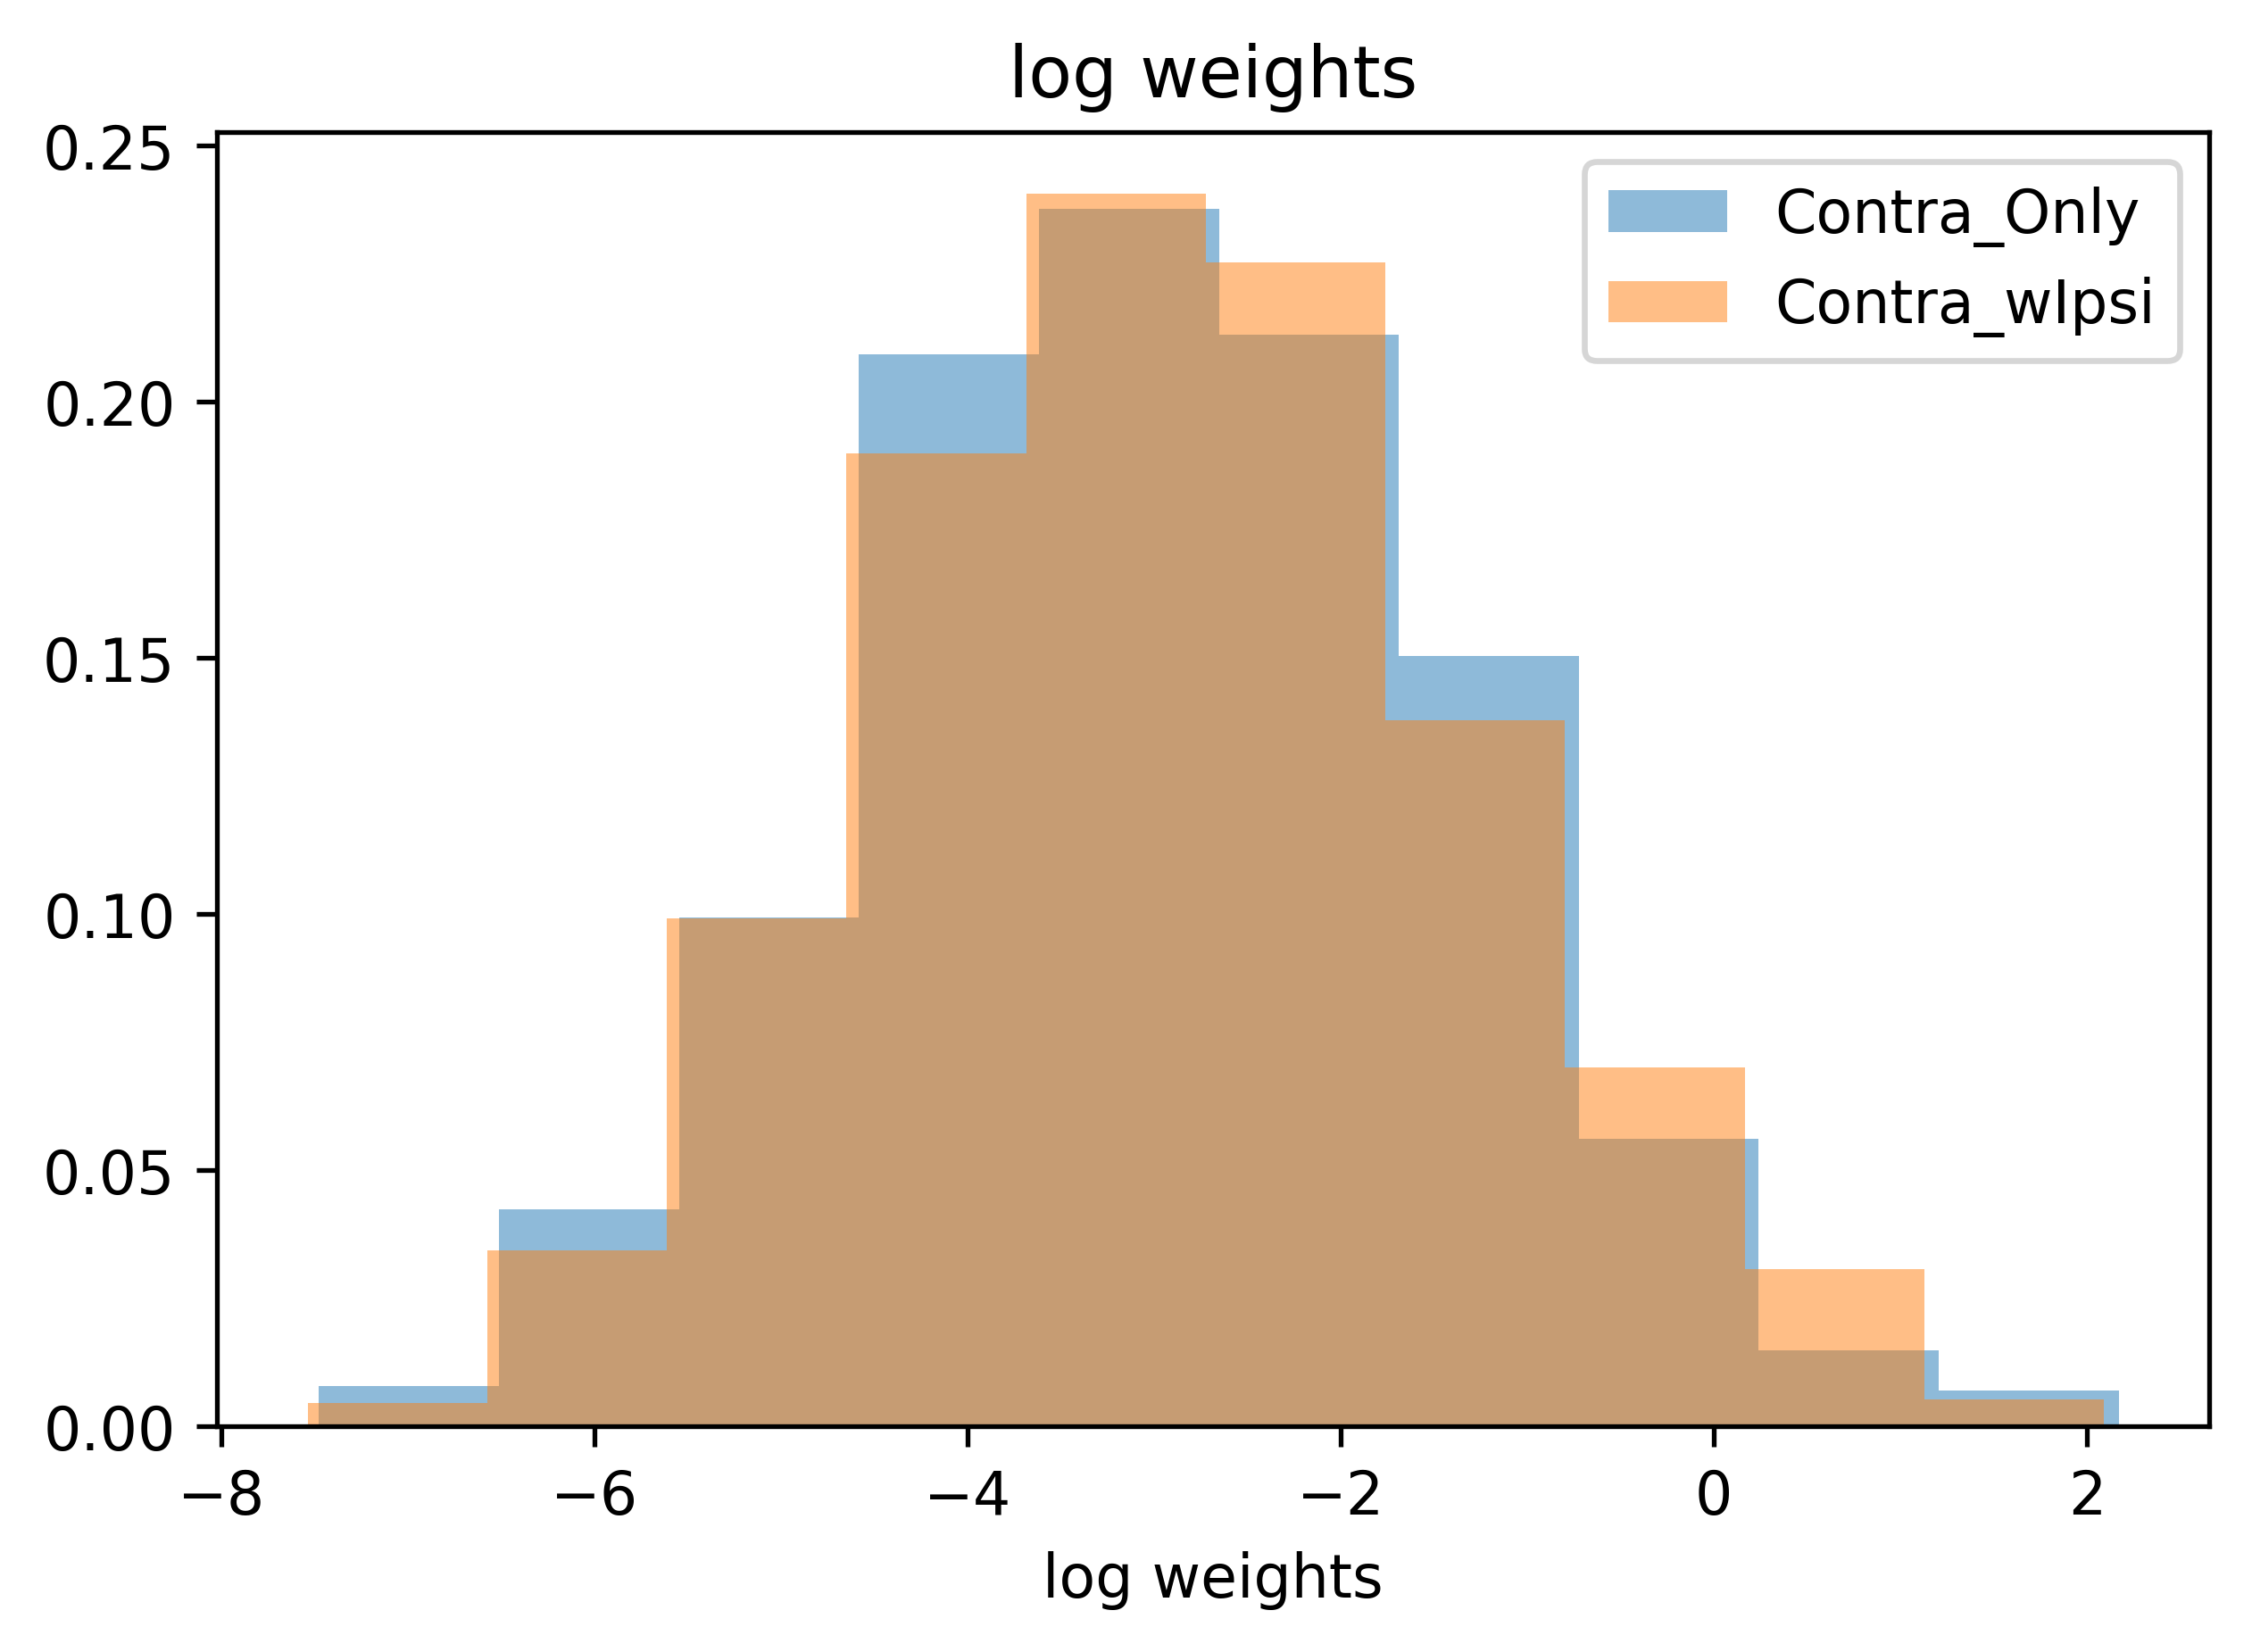

In [32]:
plt.figure(dpi=480)

plt.hist(np.log(Contra_Only), density=1, alpha=0.5, label="Contra_Only")
plt.hist(np.log(Contra_wIpsi), density=1, alpha=0.5, label="Contra_wIpsi")

plt.legend()
plt.xlabel("log weights")
plt.title("log weights")

In [33]:
### ASD Counts

In [34]:
def CountConn(STRs, W_ipsi, W_contra):
    Contra_Only = []
    Ipsi_Only = []
    Both = []
    for node_i in STRs:
        for node_j in STRs:
            w_ipsi = W_ipsi.loc[node_i, node_j]
            w_contra = W_contra.loc[node_i, node_j]
            #d_ipsi = DistanceMat_ipsi.loc[node_i, node_j]
            #d_contra = DistanceMat_contra.loc[node_i, node_j]
            if w_ipsi > 0 and w_contra == 0:
                Ipsi_Only.append(w_ipsi)
                pass
            if w_ipsi == 0 and w_contra > 0:
                Contra_Only.append(w_contra)
                pass
            if w_ipsi > 0 and w_contra > 0:
                Both.append(w_contra)
                #Both.append(w_ipsi)
                pass
            if w_ipsi ==0 and w_contra ==0:
                pass
    return Ipsi_Only, Contra_Only, Both

In [35]:
STRs = ASD_BiasDF.head(46).index.values
Ipsi_Only, Contra_Only, Both = CountConn(STRs, W_ipsi, W_contra)
print(len(Ipsi_Only), len(Contra_Only), len(Both))

127 57 129


In [36]:
Ncont = 1000
topN = 46
Sib_N_Ipsi, Sib_N_Contra, Sib_N_Both = [], [], []
for i, file in enumerate(os.listdir(contDir)):
    if file.startswith("cont.genes"):
        continue
    df = pd.read_csv(contDir + file, index_col="STR")
    
    top_strs = df.index.values[:topN]
    Ipsi_Only, Contra_Only, Both = CountConn(top_strs, W_ipsi, W_contra)
    N_Ipsi, N_Contra, N_both = len(Ipsi_Only), len(Contra_Only), len(Both)
    Sib_N_Ipsi.append(N_Ipsi)
    Sib_N_Contra.append(N_Contra)
    Sib_N_Both.append(N_both)
    
    if i >= Ncont -1:
        break

In [37]:
print(np.mean(Sib_N_Ipsi), np.mean(Sib_N_Contra), np.mean(Sib_N_Both))

80.186 66.928 86.311


In [38]:
#Reg_Dist_ContraOnly = {}
#Reg_Dist_IpsiOnly = {}
Reg_Dist = {}
for node_i in W_ipsi.index.values:
    for node_j in W_ipsi.columns.values:
        w_ipsi = W_ipsi.loc[node_i, node_j]
        w_contra = W_contra.loc[node_i, node_j]
        reg_i = str2reg[node_i]
        reg_j = str2reg[node_j]
        key = "{}-{}".format(reg_i, reg_j)
        if w_ipsi > 0 and w_contra == 0:
            if key not in Reg_Dist:
                Reg_Dist[key] = [0,0,0]
            Reg_Dist[key][0] += 1
            pass
        if w_ipsi == 0 and w_contra > 0:
            if key not in Reg_Dist:
                Reg_Dist[key] = [0,0,0]
            Reg_Dist[key][2] += 1
            pass
        if w_ipsi > 0 and w_contra > 0:
            if key not in Reg_Dist:
                Reg_Dist[key] = [0,0,0]
            Reg_Dist[key][1] += 1
            pass
        if w_ipsi ==0 and w_contra ==0:
            pass

In [39]:
Reg_Dist

{'Amygdalar-Olfactory_areas': [19, 4, 3],
 'Amygdalar-Midbrain': [2, 1, 0],
 'Amygdalar-Cortical_subplate': [6, 4, 0],
 'Amygdalar-Thalamus': [3, 1, 6],
 'Isocortex-Isocortex': [106, 200, 73],
 'Isocortex-Thalamus': [203, 73, 23],
 'Isocortex-Olfactory_areas': [6, 7, 9],
 'Isocortex-Midbrain': [101, 26, 7],
 'Isocortex-Cortical_subplate': [5, 9, 10],
 'Isocortex-Striatum': [15, 16, 2],
 'Isocortex-Pons': [32, 27, 28],
 'Isocortex-Hypothalamus': [17, 11, 1],
 'Isocortex-Hippocampus': [10, 6, 2],
 'Striatum-Olfactory_areas': [5, 1, 0],
 'Striatum-Pallidum': [9, 0, 0],
 'Striatum-Hypothalamus': [12, 0, 0],
 'Striatum-Striatum': [1, 0, 0],
 'Striatum-Midbrain': [7, 0, 0],
 'Thalamus-Isocortex': [79, 11, 31],
 'Thalamus-Hippocampus': [6, 8, 5],
 'Hypothalamus-Hypothalamus': [44, 66, 52],
 'Hypothalamus-Midbrain': [13, 46, 13],
 'Hypothalamus-Striatum': [8, 12, 5],
 'Hypothalamus-Thalamus': [34, 54, 15],
 'Hypothalamus-Pallidum': [17, 10, 3],
 'Isocortex-Amygdalar': [14, 11, 2],
 'Isocortex-